# Model Training

## Importing Required Package.

In [18]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor



#Prepreocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer



## Feching Data.

In [19]:
df=pd.read_csv('data/stud.csv')

## Selecting Top 5 Record.

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X And Y Variables.

In [21]:
X=df.drop(columns=['math_score'])
Y=df['math_score']

In [22]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


## Creating Column Transformations For Numerical And Categorical Features.

In [23]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

In [24]:
num_scalar=StandardScaler()
cat_oh_encoder=OneHotEncoder()

In [25]:
preprocessor=ColumnTransformer(transformers=[
    ('StandardScaler',num_scalar,num_features),
    ('OneHotEncoder',cat_oh_encoder,cat_features)
])

In [26]:
X=preprocessor.fit_transform(X)

## Train Test Spliting.

In [27]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.2,random_state=42)

## Model Creation And Evaluation.

In [28]:
def model_evaluation(true_val,pred_val):
    mse=mean_squared_error(true_val,pred_val)
    mae=mean_absolute_error(true_val,pred_val)
    rmse=np.sqrt(mean_squared_error(true_val,pred_val))
    r2_scr=r2_score(true_val,pred_val)
    return mse,mae,rmse,r2_scr

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [30]:
model_list=list(models)
r2_list=[]

for i in range(len(models)):
    model=models[model_list[i]]
    model.fit(Xtrain,Ytrain)

    Y_train_predict=model.predict(Xtrain)
    Y_test_predict=model.predict(Xtest)

    train_mse,train_mae,train_rmse,train_r2_scr=model_evaluation(Ytrain,Y_train_predict)
    test_mse,test_mae,test_rmse,test_r2_scr=model_evaluation(Ytest,Y_test_predict)

    r2_list.append(test_r2_scr)

    print(f"{model_list[i]} Model Performance of Training data.")

    print("-MSE Score: {:.4f}".format(train_mse))
    print("-MAE Score: {:.4f}".format(train_mae))
    print("-RMSE Score: {:.4f}".format(train_rmse))
    print("-R2 Score: {:.4f}".format(train_r2_scr))

    print("---------------------------------------")

    print(f"{model_list[i]} Model Performance of Testing data.")
    print("-MSE Score: {:.4f}".format(test_mse))
    print("-MAE Score: {:.4f}".format(test_mae))
    print("-RMSE Score: {:.4f}".format(test_rmse))
    print("-R2 Score: {:.4f}".format(test_r2_scr))

    print("=======================================")


    


Linear Regression Model Performance of Training data.
-MSE Score: 28.3349
-MAE Score: 4.2667
-RMSE Score: 5.3231
-R2 Score: 0.8743
---------------------------------------
Linear Regression Model Performance of Testing data.
-MSE Score: 29.0952
-MAE Score: 4.2148
-RMSE Score: 5.3940
-R2 Score: 0.8804
Lasso Model Performance of Training data.
-MSE Score: 43.4783
-MAE Score: 5.2063
-RMSE Score: 6.5938
-R2 Score: 0.8071
---------------------------------------
Lasso Model Performance of Testing data.
-MSE Score: 42.5063
-MAE Score: 5.1579
-RMSE Score: 6.5197
-R2 Score: 0.8253
Ridge Model Performance of Training data.
-MSE Score: 28.3378
-MAE Score: 4.2650
-RMSE Score: 5.3233
-R2 Score: 0.8743
---------------------------------------
Ridge Model Performance of Testing data.
-MSE Score: 29.0563
-MAE Score: 4.2111
-RMSE Score: 5.3904
-R2 Score: 0.8806
K-Neighbors Regressor Model Performance of Training data.
-MSE Score: 32.6355
-MAE Score: 4.5168
-RMSE Score: 5.7128
-R2 Score: 0.8552
----------

Random Forest Regressor Model Performance of Training data.
-MSE Score: 5.3485
-MAE Score: 1.8401
-RMSE Score: 2.3127
-R2 Score: 0.9763
---------------------------------------
Random Forest Regressor Model Performance of Testing data.
-MSE Score: 36.1688
-MAE Score: 4.6122
-RMSE Score: 6.0141
-R2 Score: 0.8514
XGBRegressor Model Performance of Training data.
-MSE Score: 1.0146
-MAE Score: 0.6875
-RMSE Score: 1.0073
-R2 Score: 0.9955
---------------------------------------
XGBRegressor Model Performance of Testing data.
-MSE Score: 43.5039
-MAE Score: 5.1036
-RMSE Score: 6.5958
-R2 Score: 0.8212
CatBoosting Regressor Model Performance of Training data.
-MSE Score: 9.2578
-MAE Score: 2.4054
-RMSE Score: 3.0427
-R2 Score: 0.9589
---------------------------------------
CatBoosting Regressor Model Performance of Testing data.
-MSE Score: 36.1037
-MAE Score: 4.6125
-RMSE Score: 6.0086
-R2 Score: 0.8516
AdaBoost Regressor Model Performance of Training data.
-MSE Score: 33.3874
-MAE Score: 4.7

In [31]:
dict(zip(model_list,r2_list))

{'Linear Regression': 0.8804332983749565,
 'Lasso': 0.825320079562973,
 'Ridge': 0.8805931485028737,
 'K-Neighbors Regressor': 0.7837702557426202,
 'Decision Tree': 0.7244166970769923,
 'Random Forest Regressor': 0.8513640384930797,
 'XGBRegressor': 0.8212204901494256,
 'CatBoosting Regressor': 0.8516318920747058,
 'AdaBoost Regressor': 0.8539983669184256}

In [32]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model','r2_score']).sort_values('r2_score',ascending=False)

,model,r2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,AdaBoost Regressor,0.853998
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851364
1,Lasso,0.825320
6,XGBRegressor,0.821220
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.724417


## Model Selected: Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(Xtrain, Ytrain)
y_pred = lin_model.predict(Xtest)
score = r2_score(Ytest, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot Y_test and Y_predict

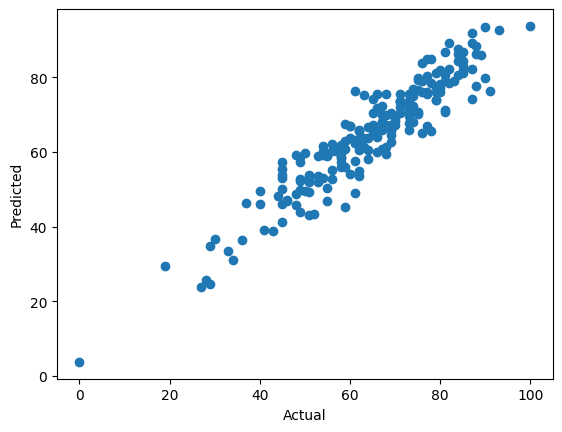

In [34]:
plt.scatter(Ytest,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

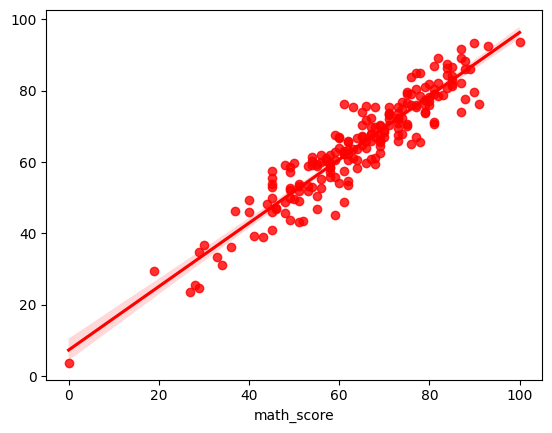

In [35]:
sns.regplot(x=Ytest,y=y_pred,color='red')
plt.show()

## Difference Between Actual And Predicted Values

In [36]:
Linear_reg=pd.DataFrame({'Actual Value':Ytest,'Predicted Value':y_pred,'Difference':Ytest-y_pred})
Linear_reg

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


# Testing

In [37]:
from sklearn.ensemble import GradientBoostingRegressor


param={
                "Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'splitter':['best','random'],
                    # 'max_features':['sqrt','log2'],
                },
                "Random Forest":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
                    # 'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Gradient Boosting":{
                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    # 'criterion':['squared_error', 'friedman_mse'],
                    # 'max_features':['auto','sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Linear Regression":{},
                "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "CatBoosting Regressor":{
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                },
                "AdaBoost Regressor":{
                    'learning_rate':[.1,.01,0.5,.001],
                    # 'loss':['linear','square','exponential'],
                    'n_estimators': [8,16,32,64,128,256]
                }
                
            }

models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }

In [38]:
model_list=list(models)
for i in range(len(models)):
    model=models[model_list[i]]
    parameter=param[model_list[i]]
    print(model,parameter)


RandomForestRegressor() {'n_estimators': [8, 16, 32, 64, 128, 256]}
DecisionTreeRegressor() {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
GradientBoostingRegressor() {'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9], 'n_estimators': [8, 16, 32, 64, 128, 256]}
LinearRegression() {}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strateg

In [39]:
print(model_list,param_list)

['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Linear Regression', 'XGBRegressor', 'CatBoosting Regressor', 'AdaBoost Regressor'] ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression', 'XGBRegressor', 'CatBoosting Regressor', 'AdaBoost Regressor']


In [40]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    para=param[list(models.keys())[i]]
    print(model,para)

RandomForestRegressor() {'n_estimators': [8, 16, 32, 64, 128, 256]}
DecisionTreeRegressor() {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
GradientBoostingRegressor() {'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9], 'n_estimators': [8, 16, 32, 64, 128, 256]}
LinearRegression() {}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strateg

In [41]:

# for i in range(len(models)):
#     print(param[list(models.keys())[i]])

In [42]:
# for i in range(len(models)):
#     print(param[list(models)[i]])

In [43]:
for i in range(len(models)):
    print(list(models.keys())[i])

Random Forest
Decision Tree
Gradient Boosting
Linear Regression
XGBRegressor
CatBoosting Regressor
AdaBoost Regressor


In [44]:
model_report= {"Random Forest": 1,
                "Decision Tree": 3,
                "Linear Regression": 4,
                "XGBRegressor": 6,
                "CatBoosting Regressor": 8,
                "AdaBoost Regressor": 5}

In [45]:
list(model_report.values()).index(8)
list[model_report]

list[{'Random Forest': 1, 'Decision Tree': 3, 'Linear Regression': 4, 'XGBRegressor': 6, 'CatBoosting Regressor': 8, 'AdaBoost Regressor': 5}]

In [46]:
list(model_report)[list(model_report.values()).index(8)]

'CatBoosting Regressor'

In [47]:
scled_data=[[0.23506043 0.169175   2.00276196 0.         0.         2.54268248
  0.         0.         0.         0.         3.07728727 0.
  0.         0.         0.         0.         2.10183809 0.
  2.09830697]]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1248521231.py, line 1)